#  EUC sensitivity: summary

Gustavo Marques (gmarques@ucar.edu)

Last update: 04/10/2020

### Experiments 
* **G25**: MEKE/GEOMETRIC + AH = 1E12 (background biharmonic) + MEKE_GEOMETRIC_ALPHA=0.08 + KH_RES_SCALE_COEF = 1.0
* **G36**: G25 + BIHARMONIC=False 
* **G54**: G25 + KH_RES_SCALE_COEF = 0.4 +  MEKE_VISCOSITY_COEFF_AU = 2.5
* **G55**: G47 + MEKE_VISCOSITY_COEFF_AU = 0 + AH=5E11


```KH_RES_SCALE_COEF``` = A coefficient that determines how KhTh is scaled away if RESOLN_SCALED_... is true, as F = 1 / (1 + (KH_RES_SCALE_COEF*Rd/dx)^KH_RES_FN_POWER)

```MEKE_VISCOSITY_COEFF_AU``` = If non-zero, is the scaling coefficient in the expression for viscosity used to parameterize biharmonic lateral momentum mixing by unresolved eddies represented by MEKE

```MEKE_GEOMETRIC_ALPHA``` = The nondimensional coefficient governing the efficiency of the GEOMETRIC thickness diffusion
                               
### Time averages:
Run for 4 years, time averages over last 2 years

In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
path = '/glade/scratch/gmarques/'
exps = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.025',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.036',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.054',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.055']
labels = ['G25', 'G36', 'G54', 'G55']

def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

import seaborn, matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [28]:
# load grid
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot, polarplot, xyplot, xycompare
import cartopy.crs as ccrs
import cartopy.feature
grd = MOM6grid('/glade/scratch/gmarques/'+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


# Equatorial plots

## Temperature

<center> <font size="4">Equatorial_Global_temperature</font></center>
<table><tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.025_Equatorial_Global_temperature.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Global_temperature.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Global_temperature.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.055_Equatorial_Global_temperature.png'></td>
    </tr>    
</table>

## Salinity

<center> <font size="4">Equatorial_Global_salinity</font></center>
<table><tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.025_Equatorial_Global_salinity.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Global_salinity.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Global_salinity.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.055_Equatorial_Global_salinity.png'></td>
    </tr>    
</table>

## Undercurrent

<center> <font size="4">Equatorial_Pacific_uo</font></center>
<table><tr>
    <td><center><font size="4">G25</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.025_Equatorial_Pacific_uo.png'></td></tr>
    <tr>
             <td><center><font size="4">G36</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Pacific_uo.png'></td></tr> 
    <tr><td><center><font size="4">G54</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.054_Equatorial_Pacific_uo.png'></td></tr>
    <tr><td><center><font size="4">G55</font></center><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.055_Equatorial_Pacific_uo.png'></td></tr>
</table>

# Transport time series

In [8]:
#i=0
#ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_section_transports.nc')
#ds.sections

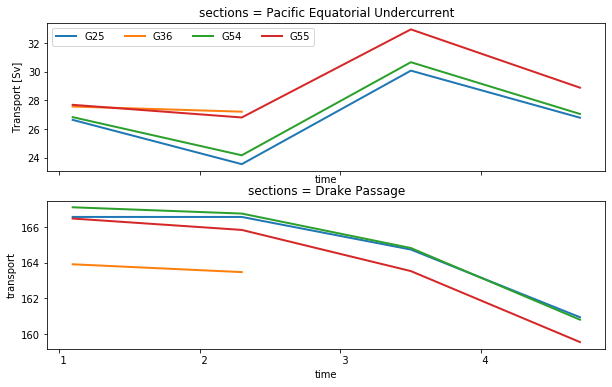

In [12]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_section_transports.nc')

  ds.transport.sel(time=slice('0001-01-01','0005-01-01')).sel(sections='Pacific Equatorial Undercurrent').plot(ax=ax[0], 
                    label=labels[i], lw=2)
  ds.transport.sel(time=slice('0001-01-01','0005-01-01')).sel(sections='Drake Passage').plot(ax=ax[1], 
                    label=labels[i], lw=2)

ax[0].set_ylabel('Transport [Sv]'); ax[0].legend(ncol=6)

# Mixing coefficients

In [15]:
def get_data_sf(full_path):
  ds = xr.open_dataset(full_path)
  return ds
variables = ['diftrblo', 'difmxylo' ,'difmxybo', 'diftrelo']

In [20]:
exps = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.025',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.054',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.055']
labels = ['G25','G54', 'G55']

## GM (KHTH)

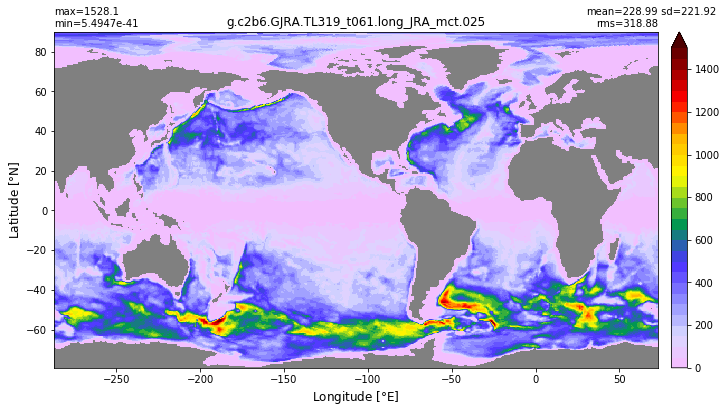

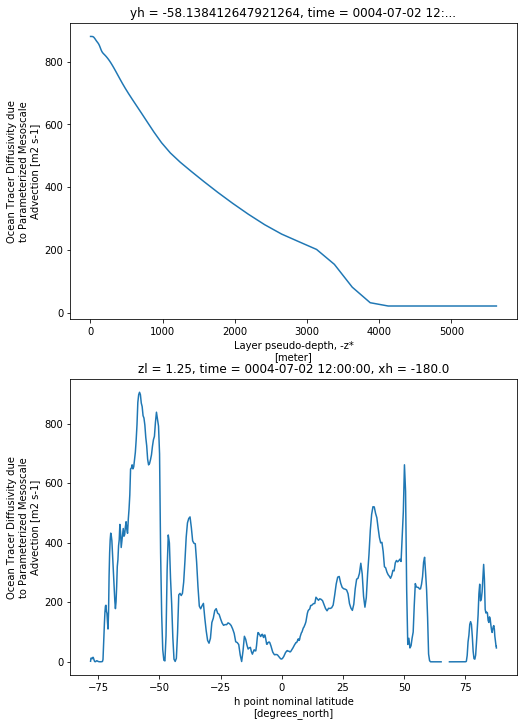

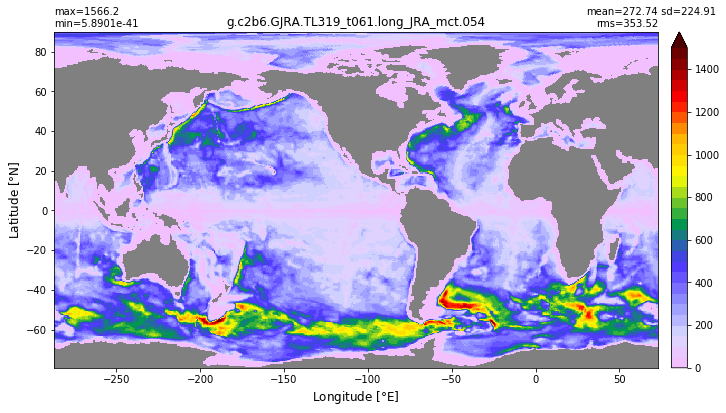

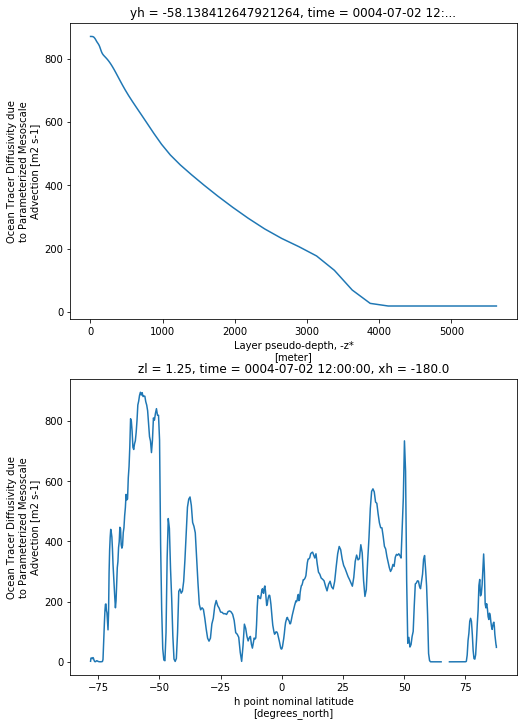

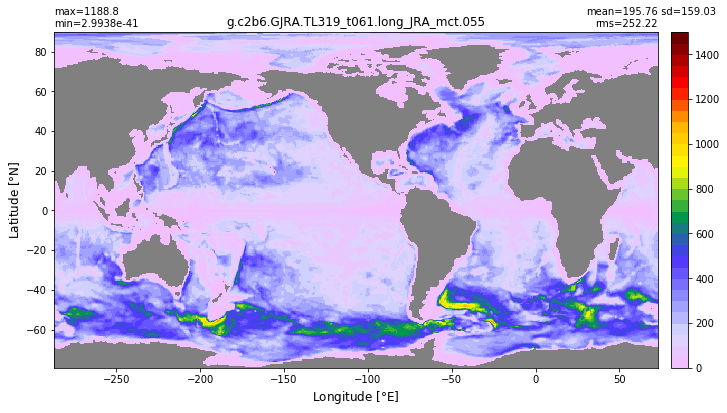

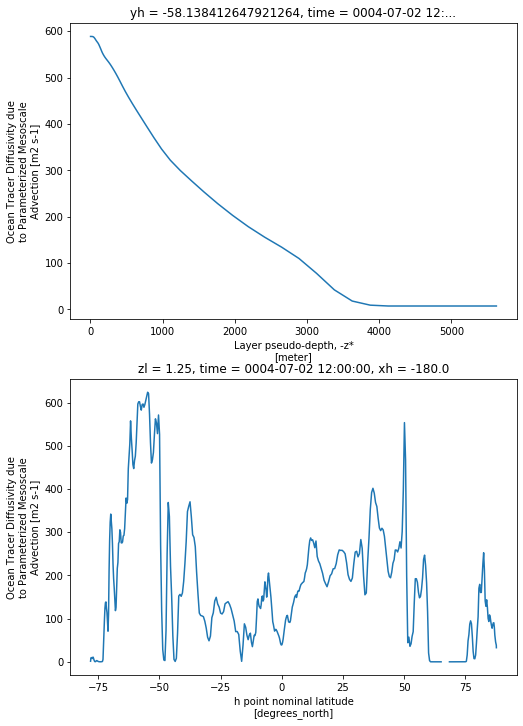

In [22]:
# GM coefficient
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
i1 = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0004.nc')
  xyplot(np.ma.masked_invalid(ds[variables[0]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, 
         clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(2,1, figsize=(8,12))
  ds[variables[0]][0,:,j,i].plot(ax=ax[0])
  ds[variables[0]][0,0,:,i1].plot(ax=ax[1])


## Laplacian viscosity

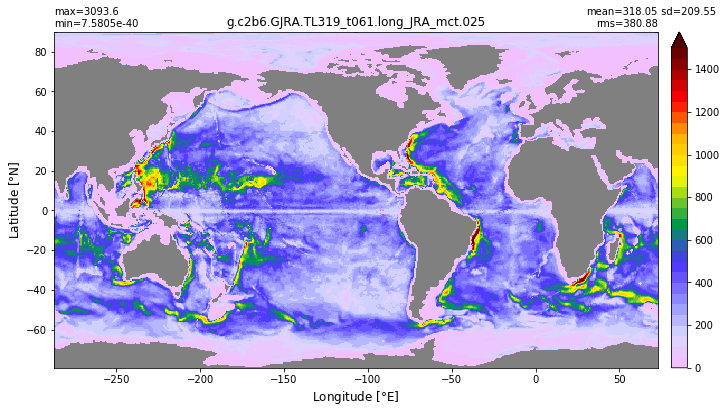

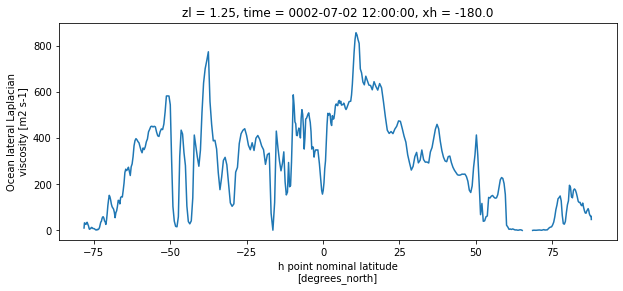

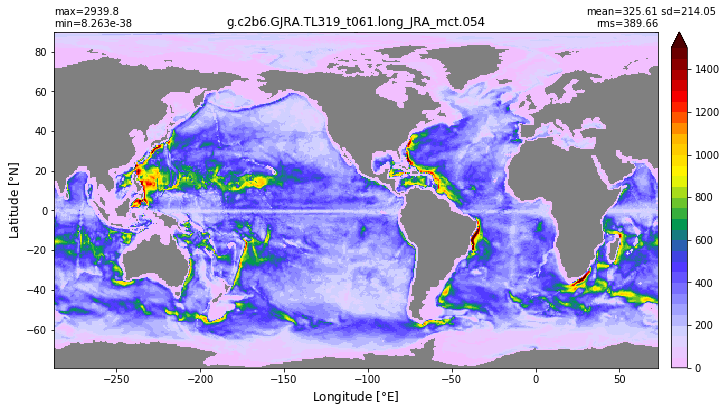

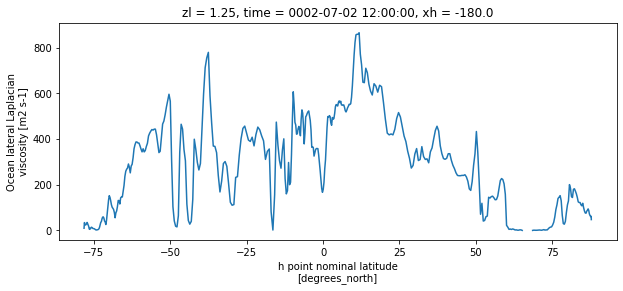

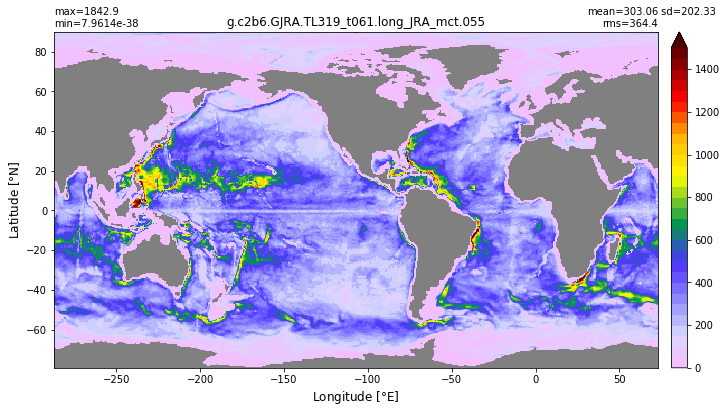

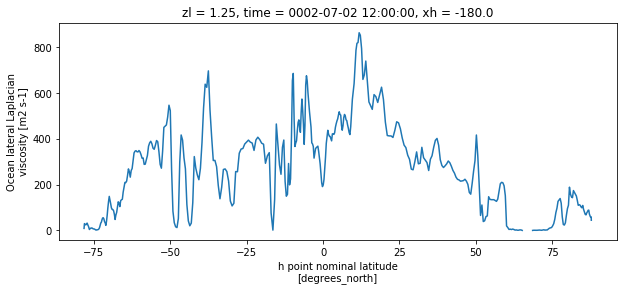

In [23]:
# Laplacian visc
i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002.nc')
  xyplot(np.ma.masked_invalid(ds[variables[1]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[1]][0,0,:,i].plot(ax=ax)
  #ax.set_title(''); ax[1].set_title('');

## Biharmonic viscosity

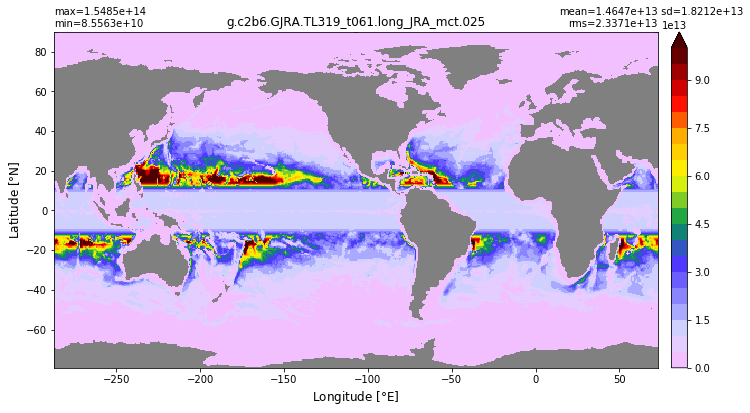

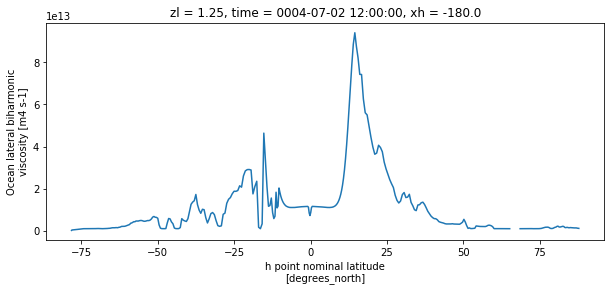

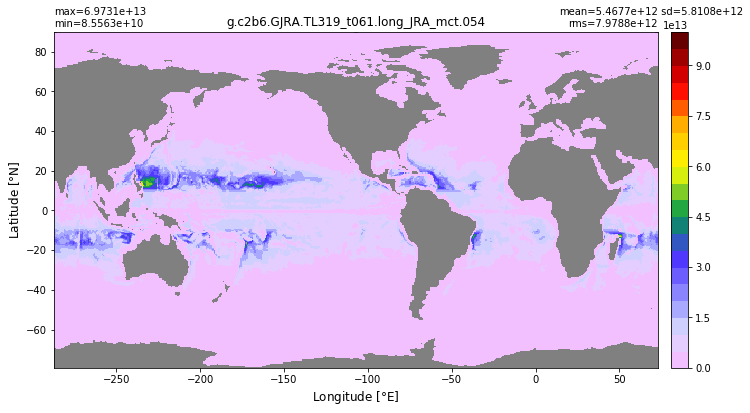

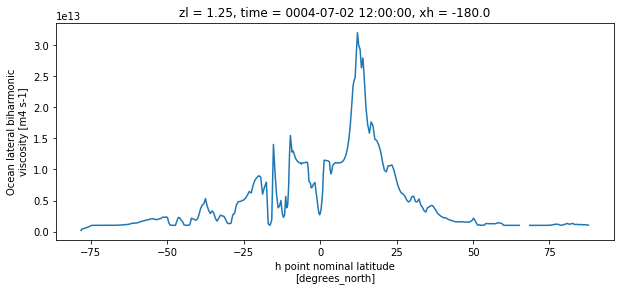

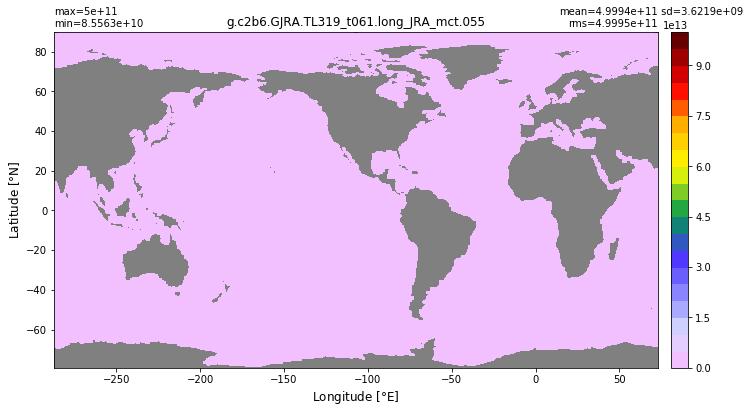

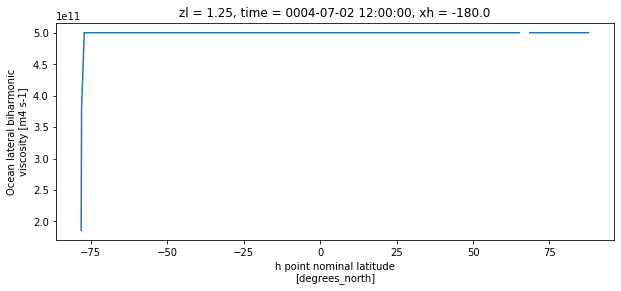

In [26]:
# Biharmonic

i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0004.nc')
  xyplot(np.ma.masked_invalid(ds[variables[2]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(1.0e10,1.0e14), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[2]][0,0,:,i].plot(ax=ax)
    

## Redi (KHTR)

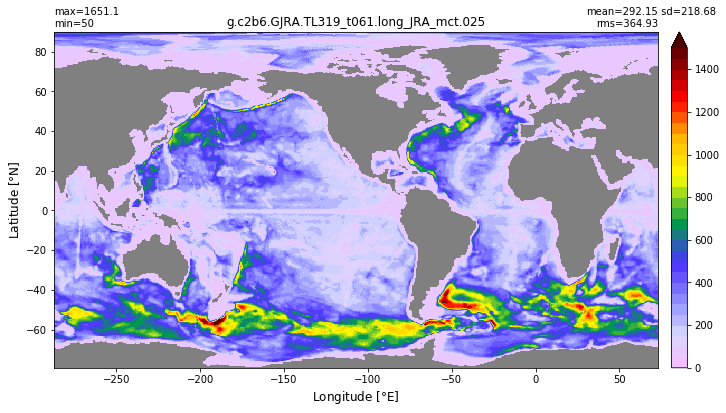

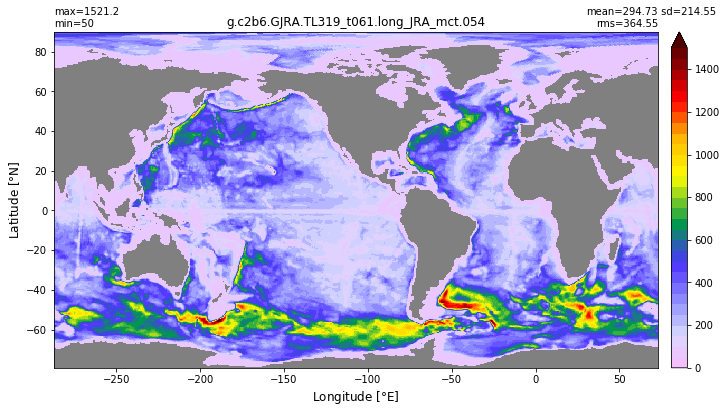

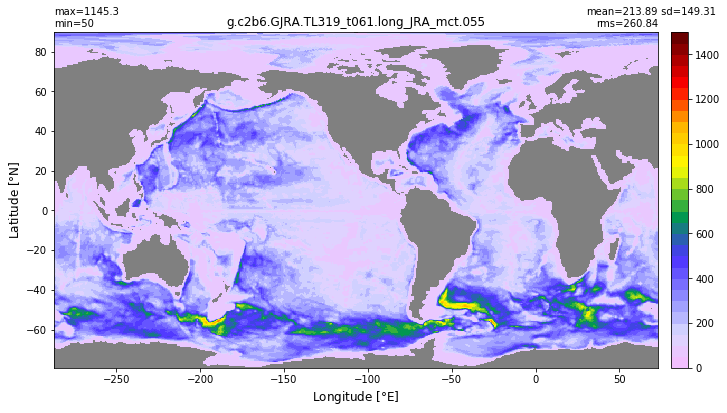

In [25]:
# KHTR (Redi)
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0004.nc')
  xyplot(np.ma.masked_invalid(ds[variables[3]][0,:].values), grd.geolon, grd.geolat, clim=(0, 1500), area=grd.area_t, title=str(exps[exp]))